In [4]:
import pandas as pd
import os
from datetime import datetime, timedelta

def read_from_files(directory, begin_date, end_date):
    """
    Read pickle files from directory for the date range specified.
    
    Parameters:
    - directory: path to directory containing pickle files
    - begin_date: start date in 'YYYY-MM-DD' format
    - end_date: end date in 'YYYY-MM-DD' format
    
    Returns:
    - DataFrame containing all transactions in the date range
    """
    # Convert string dates to datetime objects
    start = datetime.strptime(begin_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    
    # List to store dataframes
    df_list = []
    
    # Iterate through date range
    current_date = start
    while current_date <= end:
        filename = current_date.strftime("%Y-%m-%d") + ".pkl"
        filepath = os.path.join(directory, filename)
        
        # Check if file exists and read it
        if os.path.exists(filepath):
            df = pd.read_pickle(filepath)
            df_list.append(df)
            print(f"Loaded {filename}: {len(df)} transactions")
        else:
            print(f"Warning: {filename} not found")
        
        # Move to next day
        current_date += timedelta(days=1)
    
    # Concatenate all dataframes
    if df_list:
        transactions_df = pd.concat(df_list, ignore_index=True)
        return transactions_df
    else:
        print("No data files found in the specified date range")
        return pd.DataFrame()

Using simulated-data-transformed datasets, that split the timestamp into 2 new features :

The first will characterize whether a transaction occurs during a weekday (value 0) or a weekend (1), and will be called TX_DURING_WEEKEND

The second will characterize whether a transaction occurs during the day or during the day (0) or during the night (1). The night is defined as hours that are between 0pm and 6am. It will be called TX_DURING_NIGHT.

It also add two new features related to customer spending behaviour {CUSTOMER_ID_NB_TX_30DAY_WINDOW and CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW }

Moreover, it also calculate the risk score, that assess the exposure of a terminal to fraudulant transactions!

In [5]:
DIR_INPUT='/Users/shubham/Desktop/FraudDetection/simulated-data-transformed' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)

if len(transactions_df) > 0:
    print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))
else:
    print("No transactions loaded")

Load  files
Loaded 2018-04-01.pkl: 9488 transactions
Loaded 2018-04-01.pkl: 9488 transactions
Loaded 2018-04-02.pkl: 9583 transactions
Loaded 2018-04-02.pkl: 9583 transactions
Loaded 2018-04-03.pkl: 9747 transactions
Loaded 2018-04-03.pkl: 9747 transactions
Loaded 2018-04-04.pkl: 9530 transactions
Loaded 2018-04-04.pkl: 9530 transactions
Loaded 2018-04-05.pkl: 9651 transactions
Loaded 2018-04-05.pkl: 9651 transactions
Loaded 2018-04-06.pkl: 9539 transactions
Loaded 2018-04-06.pkl: 9539 transactions
Loaded 2018-04-07.pkl: 9438 transactions
Loaded 2018-04-07.pkl: 9438 transactions
Loaded 2018-04-08.pkl: 9468 transactions
Loaded 2018-04-08.pkl: 9468 transactions
Loaded 2018-04-09.pkl: 9699 transactions
Loaded 2018-04-09.pkl: 9699 transactions
Loaded 2018-04-10.pkl: 9672 transactions
Loaded 2018-04-10.pkl: 9672 transactions
Loaded 2018-04-11.pkl: 9622 transactions
Loaded 2018-04-11.pkl: 9622 transactions
Loaded 2018-04-12.pkl: 9541 transactions
Loaded 2018-04-12.pkl: 9541 transactions
Load

In [6]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


## Data Analysis 


In [8]:
transactions_df.shape

(1754155, 23)

In [9]:
# 1) Quick shape and preview
print("Rows:", len(transactions_df))
print("Columns:", list(transactions_df.columns))
transactions_df.head()

Rows: 1754155
Columns: ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 2) Missing values (top 20)
missing = transactions_df.isna().sum().sort_values(ascending=False)
missing.head(20)

TRANSACTION_ID                         0
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0
TERMINAL_ID_NB_TX_30DAY_WINDOW         0
TERMINAL_ID_RISK_7DAY_WINDOW           0
TERMINAL_ID_NB_TX_7DAY_WINDOW          0
TERMINAL_ID_RISK_1DAY_WINDOW           0
TERMINAL_ID_NB_TX_1DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0
CUSTOMER_ID_NB_TX_30DAY_WINDOW         0
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0
CUSTOMER_ID_NB_TX_7DAY_WINDOW          0
CUSTOMER_ID_NB_TX_1DAY_WINDOW          0
TX_DATETIME                            0
TX_DURING_NIGHT                        0
TX_DURING_WEEKEND                      0
TX_FRAUD_SCENARIO                      0
TX_FRAUD                               0
TX_TIME_DAYS                           0
TX_TIME_SECONDS                        0
TX_AMOUNT                              0
dtype: int64

In [11]:
# 3) Descriptive statistics (numeric columns)
transactions_df.describe().T

,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,1754155.0,877077.0,0.0,438538.5,877077.0,1315615.5,1754154.0,506381.075063
TX_DATETIME,1754155,2018-07-01 11:20:33.708572160,2018-04-01 00:00:31,2018-05-16 14:40:46.500000,2018-07-01 11:11:10,2018-08-16 08:01:01.500000,2018-09-30 23:59:57,NaN
TX_AMOUNT,1754155.0,53.632302,0.0,21.01,44.64,76.95,2628.0,42.326492
TX_FRAUD,1754155.0,0.008369,0.0,0.0,0.0,0.0,1.0,0.0911
TX_FRAUD_SCENARIO,1754155.0,0.018824,0.0,0.0,0.0,0.0,3.0,0.211326
TX_DURING_WEEKEND,1754155.0,0.289818,0.0,0.0,0.0,1.0,1.0,0.453678
TX_DURING_NIGHT,1754155.0,0.173855,0.0,0.0,0.0,0.0,1.0,0.378985
CUSTOMER_ID_NB_TX_1DAY_WINDOW,1754155.0,3.560578,1.0,2.0,3.0,5.0,16.0,1.847658
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,1754155.0,53.627409,0.0,25.71,49.253333,76.0,1377.075,35.046341
CUSTOMER_ID_NB_TX_7DAY_WINDOW,1754155.0,18.640448,1.0,13.0,19.0,24.0,52.0,7.883447


In [12]:
# 4) Fraud class balance (if available)
if "TX_FRAUD" in transactions_df.columns:
    counts = transactions_df["TX_FRAUD"].value_counts(dropna=False)
    ratio = (counts.get(1, 0) / max(counts.sum(), 1)) if 1 in counts.index else None
    display(counts)
    if ratio is not None:
        print(f"Fraud ratio: {ratio:.3%}")
else:
    print("Column 'TX_FRAUD' not found.")

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Fraud ratio: 0.837%


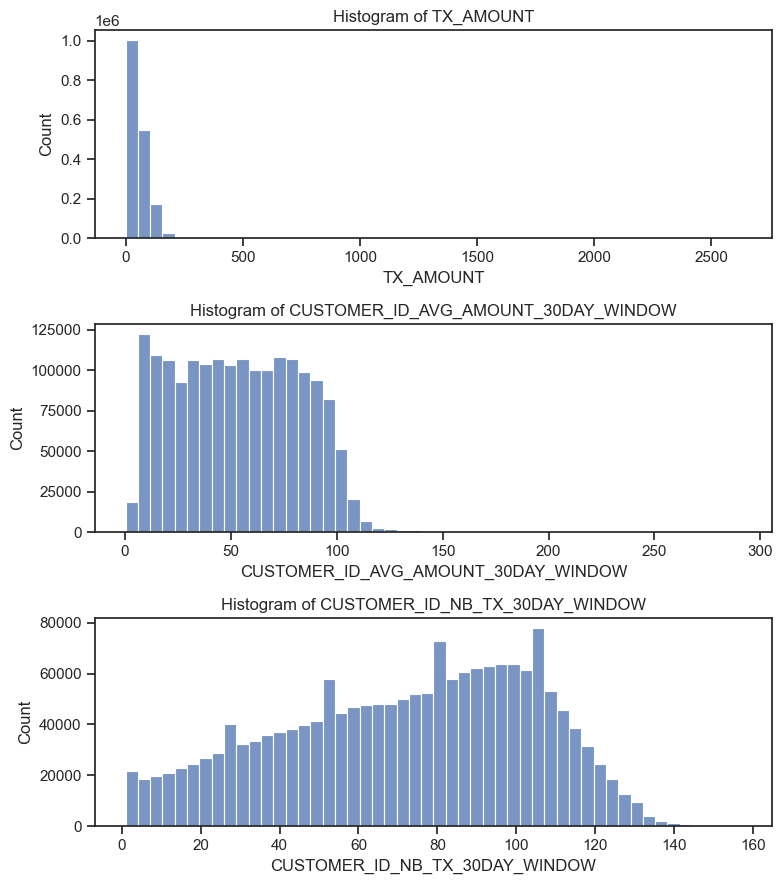

In [13]:
# 5) Histograms (one figure)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", context="notebook")

cols = [
    "TX_AMOUNT",
    "CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW",
    "CUSTOMER_ID_NB_TX_30DAY_WINDOW",
    "TERMINAL_RISK",
]
available = [c for c in cols if c in transactions_df.columns]

if available:
    n = len(available)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 3*n))
    if n == 1:
        axes = [axes]
    for ax, col in zip(axes, available):
        sns.histplot(data=transactions_df, x=col, bins=50, ax=ax)
        ax.set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No selected columns available for histograms.")

**What the histograms show**
- Wide spread suggests varied spending; long right tail often means a few high-value transactions.
- Compare shapes: if `TERMINAL_RISK` is skewed right, most terminals are low risk with a few risky ones.
- Use the peaks to spot common ranges; heavy tails can impact mean vs median.

Skipping TX_AMOUNT vs TERMINAL_RISK (missing columns)


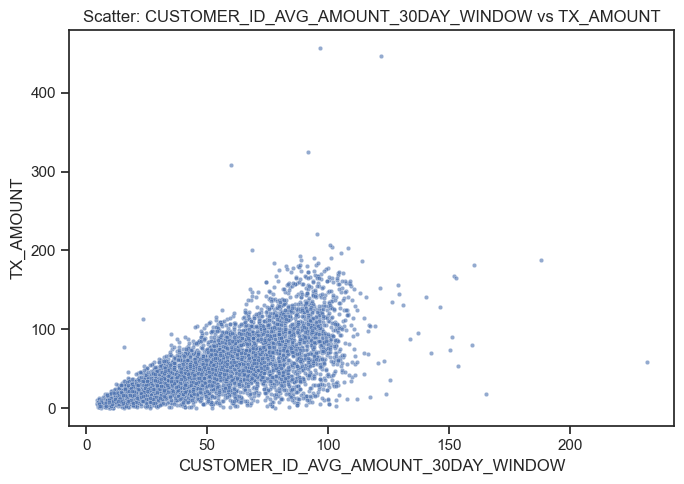

In [14]:
# 6) Scatterplots (pair by pair)
import seaborn as sns
import matplotlib.pyplot as plt

pairs = [
    ("TX_AMOUNT", "TERMINAL_RISK"),
    ("CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW", "TX_AMOUNT"),
]

for x, y in pairs:
    if x in transactions_df.columns and y in transactions_df.columns:
        plt.figure(figsize=(7, 5))
        sample_df = transactions_df.sample(min(len(transactions_df), 5000), random_state=42)
        sns.scatterplot(data=sample_df, x=x, y=y, s=10, alpha=0.6)
        plt.title(f"Scatter: {x} vs {y}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {x} vs {y} (missing columns)")

**How to read these scatterplots**
- Trend: Upward pattern hints at positive relation; scattered cloud suggests weak relation.
- Density: Dense areas show common value ranges; sparse areas/outliers may need attention.
- Use cases: If higher `TERMINAL_RISK` aligns with higher `TX_AMOUNT`, consider interaction terms or caps.

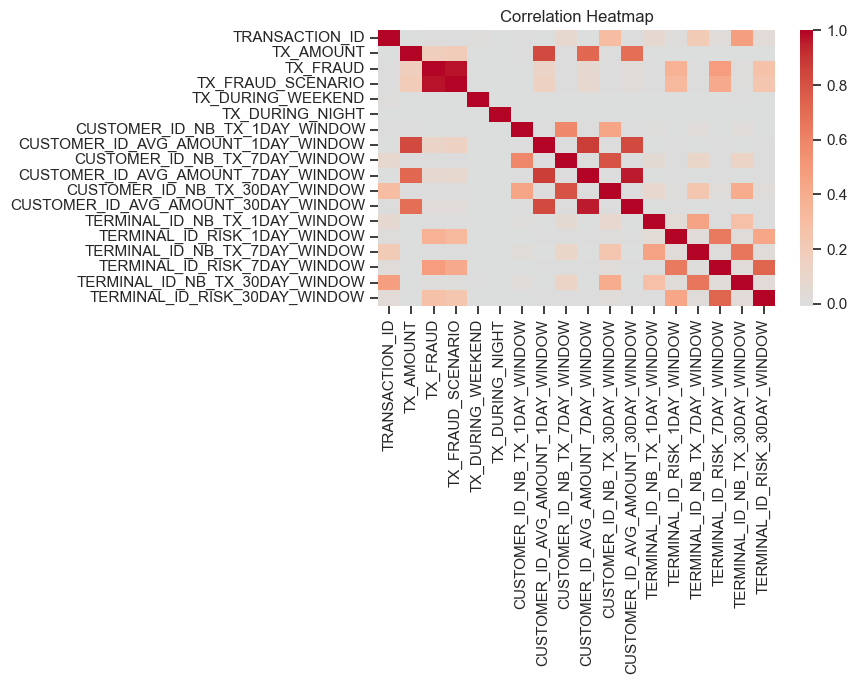

In [15]:
# 7) Correlation heatmap (numeric features)
import seaborn as sns
import matplotlib.pyplot as plt

num_df = transactions_df.select_dtypes(include=["number"]).copy()
if not num_df.empty:
    corr = num_df.corr(numeric_only=True)
    plt.figure(figsize=(9, 7))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation.")

**Interpreting the correlation heatmap**
- Color: Red means positive correlation, blue negative; stronger color = stronger relation.
- Action: Highly correlated features can be reduced (e.g., drop one) to avoid multicollinearity.
- Tip: Focus on correlations with `TX_FRAUD` and `TX_AMOUNT` to guide feature engineering.

### Weekend/Night Comparisons
We'll compare `TX_AMOUNT` across:
- `TX_DURING_WEEKEND` (0 = weekday, 1 = weekend)
- `TX_DURING_NIGHT` (0 = day, 1 = night)

Each plot is in its own cell for a natural flow.

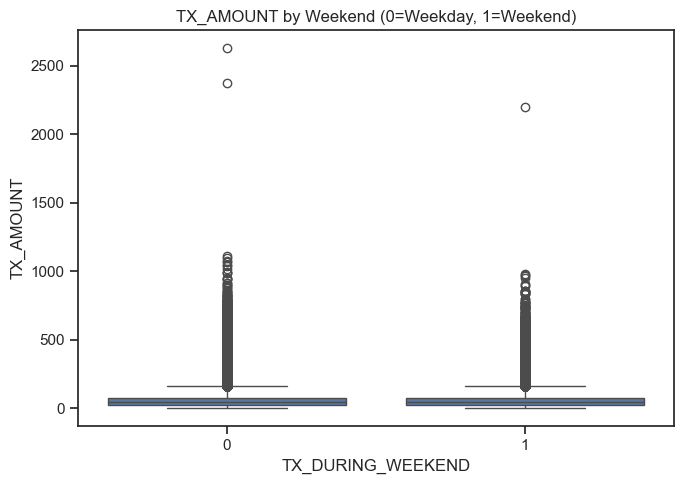

In [16]:
# 8) Boxplot: TX_AMOUNT by TX_DURING_WEEKEND
import seaborn as sns
import matplotlib.pyplot as plt

if "TX_AMOUNT" in transactions_df.columns and "TX_DURING_WEEKEND" in transactions_df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=transactions_df, x="TX_DURING_WEEKEND", y="TX_AMOUNT")
    plt.title("TX_AMOUNT by Weekend (0=Weekday, 1=Weekend)")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'TX_AMOUNT' or 'TX_DURING_WEEKEND' column.")

**Weekend boxplot summary**
- Center (median): Compare 0 vs 1 to see typical amount differences.
- Spread (IQR): Taller box means more variability.
- Whiskers/outliers: Longer whiskers and many points indicate heavier tails (rare high amounts).
- Takeaway example to write after you run: “Weekend median is X vs weekday Y; weekend variability is higher/lower.”

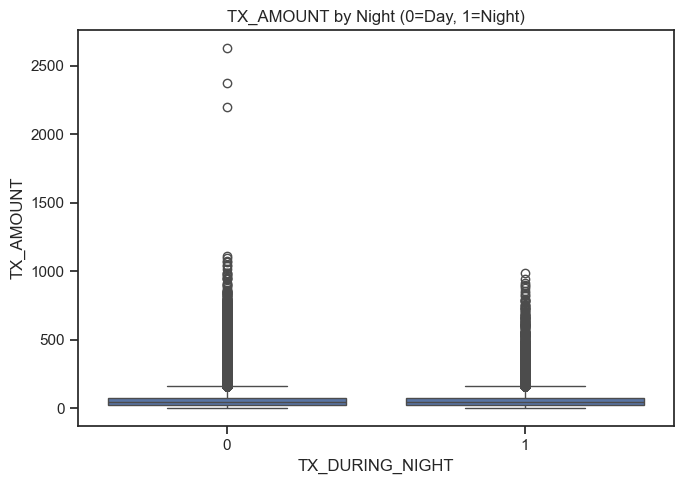

: 

In [ ]:
# 9) Boxplot: TX_AMOUNT by TX_DURING_NIGHT
import seaborn as sns
import matplotlib.pyplot as plt

if "TX_AMOUNT" in transactions_df.columns and "TX_DURING_NIGHT" in transactions_df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=transactions_df, x="TX_DURING_NIGHT", y="TX_AMOUNT")
    plt.title("TX_AMOUNT by Night (0=Day, 1=Night)")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'TX_AMOUNT' or 'TX_DURING_NIGHT' column.")

**Night boxplot summary**
- Center (median): Higher median at 1 means typical night amounts are larger.
- Spread (IQR): Taller box at 1 → more variability at night.
- Whiskers/outliers: More extreme values at night suggest a heavier right tail.
- Takeaway example to write after you run: “Night median is X vs day Y; night shows more/less spread.”

In [17]:
# 12) Quick numeric summary to read boxplots
import pandas as pd

def summarize_group(df, group_col, value_col):
    if group_col in df.columns and value_col in df.columns:
        summary = df.groupby(group_col)[value_col].agg([
            ("count", "count"),
            ("mean", "mean"),
            ("median", "median"),
            ("std", "std"),
            ("p25", lambda s: s.quantile(0.25)),
            ("p75", lambda s: s.quantile(0.75)),
            ("max", "max")
        ])
        return summary
    else:
        return pd.DataFrame({"error": [f"Missing columns: {group_col} or {value_col}"]})

print("Weekend vs Weekday (TX_AMOUNT):")
display(summarize_group(transactions_df, "TX_DURING_WEEKEND", "TX_AMOUNT"))

print("Night vs Day (TX_AMOUNT):")
display(summarize_group(transactions_df, "TX_DURING_NIGHT", "TX_AMOUNT"))

Weekend vs Weekday (TX_AMOUNT):


,count,mean,median,std,p25,p75,max
TX_DURING_WEEKEND,,,,,,,
0,1245770,53.632704,44.62,42.340195,21.01,76.94,2628.00
1,508385,53.631315,44.68,42.292937,20.98,76.97,2202.75


Night vs Day (TX_AMOUNT):


,count,mean,median,std,p25,p75,max
TX_DURING_NIGHT,,,,,,,
0,1449186,53.632039,44.63,42.348434,20.99,76.94,2628.00
1,304969,53.633550,44.66,42.222141,21.08,76.98,986.85


## Data Exploration: PCA and Decision Trees

We'll start with PCA to understand the main patterns in the data, then use a simple decision tree to see which features help separate fraud from normal transactions.

### Step 1: Standardize numeric features for PCA
PCA works best when all numeric features are on the same scale. We'll use StandardScaler to do this.

In [18]:
# Select only numeric columns (drop target and IDs)
from sklearn.preprocessing import StandardScaler
import numpy as np

num_cols = transactions_df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target and IDs if present
for col in ["TX_FRAUD", "CUSTOMER_ID", "TERMINAL_ID"]:
    if col in num_cols:
        num_cols.remove(col)

X_num = transactions_df[num_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

print(f"Standardized {len(num_cols)} numeric features for PCA.")

Standardized 17 numeric features for PCA.


### Step 2: Run PCA and plot explained variance
We'll see how much variance each principal component explains, and how many are needed for 96%.

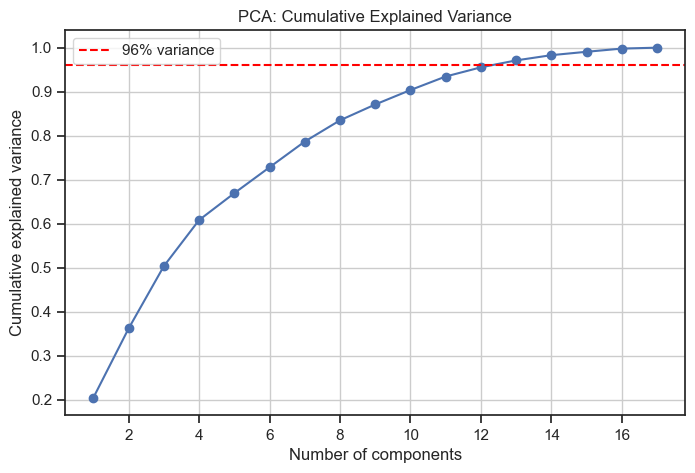

Number of components to explain 96% variance: 13


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.axhline(0.96, color='red', linestyle='--', label='96% variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find number of components for 96% variance
n_96 = np.argmax(explained >= 0.96) + 1
print(f"Number of components to explain 96% variance: {n_96}")

**What does the PCA plot show?**
- The curve shows how much of the data's variance is captured as we add more principal components.
- The red line marks 96% variance. The number where the curve crosses this line is how many components you need to keep most of the information.
- If only a few components are needed, the data has strong patterns or redundancy.

### Step 3: Look at the most important features for the top principal components
This helps us see which original features matter most in the main patterns found by PCA.

In [20]:
# Show top features for the first 2 principal components
import pandas as pd

components = pd.DataFrame(pca.components_[:2], columns=num_cols, index=["PC1", "PC2"])
for pc in components.index:
    print(f"\nTop features for {pc}:")
    display(components.loc[pc].abs().sort_values(ascending=False).head(5))


Top features for PC1:


CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0.511089
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0.508773
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0.500299
TX_AMOUNT                              0.465569
TX_FRAUD_SCENARIO                      0.099709
Name: PC1, dtype: float64


Top features for PC2:


CUSTOMER_ID_NB_TX_30DAY_WINDOW    0.489885
TERMINAL_ID_NB_TX_30DAY_WINDOW    0.417825
CUSTOMER_ID_NB_TX_7DAY_WINDOW     0.408162
TERMINAL_ID_NB_TX_7DAY_WINDOW     0.361808
CUSTOMER_ID_NB_TX_1DAY_WINDOW     0.284407
Name: PC2, dtype: float64

**What do the top features mean?**
- The features with the largest values for each principal component are the most important for that pattern.
- For example, if `TX_AMOUNT` is top for PC1, then overall spending drives the main variation in the data.
- This helps you know which features are most influential in the dataset's structure.

### Decision Tree: Fraud Classification

We'll train a simple decision tree to predict fraud. We'll use features that characterize the transaction context (amount, time, customer behavior, terminal risk) to predict if a transaction is fraudulent.

In [21]:
transactions_df.shape

(1754155, 23)

In [22]:
# Step 1: Define input and output features
output_feature = "TX_FRAUD"

# Select features that characterize transaction context
input_features = [
    'TX_AMOUNT', 
    'TX_DURING_WEEKEND', 
    'TX_DURING_NIGHT',
    'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
    'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
    'TERMINAL_RISK'
]

# Only keep features that exist in our data
input_features = [f for f in input_features if f in transactions_df.columns]

print(f"Output feature: {output_feature}")
print(f"Input features: {input_features}")

# Prepare X and y
X = transactions_df[input_features].fillna(0)
y = transactions_df[output_feature]

print(f"\nTotal transactions: {len(X)}")
print(f"Fraudulent transactions: {y.sum()}")
print(f"Fraud rate: {y.sum()/len(y):.4f}")

Output feature: TX_FRAUD
Input features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW']

Total transactions: 1754155
Fraudulent transactions: 14681
Fraud rate: 0.0084


In [23]:
# Step 2: Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train size: {len(X_train)} ({y_train.sum()} frauds)")
print(f"Test size: {len(X_test)} ({y_test.sum()} frauds)")

Train size: 1227908 (10326 frauds)
Test size: 526247 (4355 frauds)


In [24]:
X_train.shape

(1227908, 5)

In [25]:
X_train[y_train==1].shape

(10326, 5)

In [26]:
X_test.shape

(526247, 5)

In [27]:
X_test[y_test==1].shape

(4355, 5)

That is, a proportion of 0.008 fraudulent transactions.

In [28]:
4355/526247

0.00827558161851754

### Step 3: Train a simple decision tree
We'll use a tree with max depth 2 for easy interpretation. This helps us see which features matter most for fraud detection.

In [29]:
from sklearn.tree import DecisionTreeClassifier
import time

# Create and train the decision tree (depth=2 for interpretability)
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

start_time = time.time()
tree.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"Training time: {training_time:.3f} seconds")
print(f"Train accuracy: {tree.score(X_train, y_train):.4f}")
print(f"Test accuracy: {tree.score(X_test, y_test):.4f}")

Training time: 1.058 seconds
Train accuracy: 0.9934
Test accuracy: 0.9936


In [30]:
# Step 4: Get predictions (probabilities of fraud)
start_time = time.time()
predictions_test = tree.predict_proba(X_test)[:, 1]  # Probability of fraud
prediction_time = time.time() - start_time

predictions_train = tree.predict_proba(X_train)[:, 1]

print(f"Prediction time: {prediction_time:.3f} seconds")
print(f"\nFirst 5 test predictions (fraud probability):")
print(predictions_test[:5])

Prediction time: 0.029 seconds

First 5 test predictions (fraud probability):
[0.00649144 0.00649144 0.00649144 0.00649144 0.00649144]


### Step 5: Visualize the decision tree
Let's plot the tree to see which features and thresholds it uses to detect fraud.

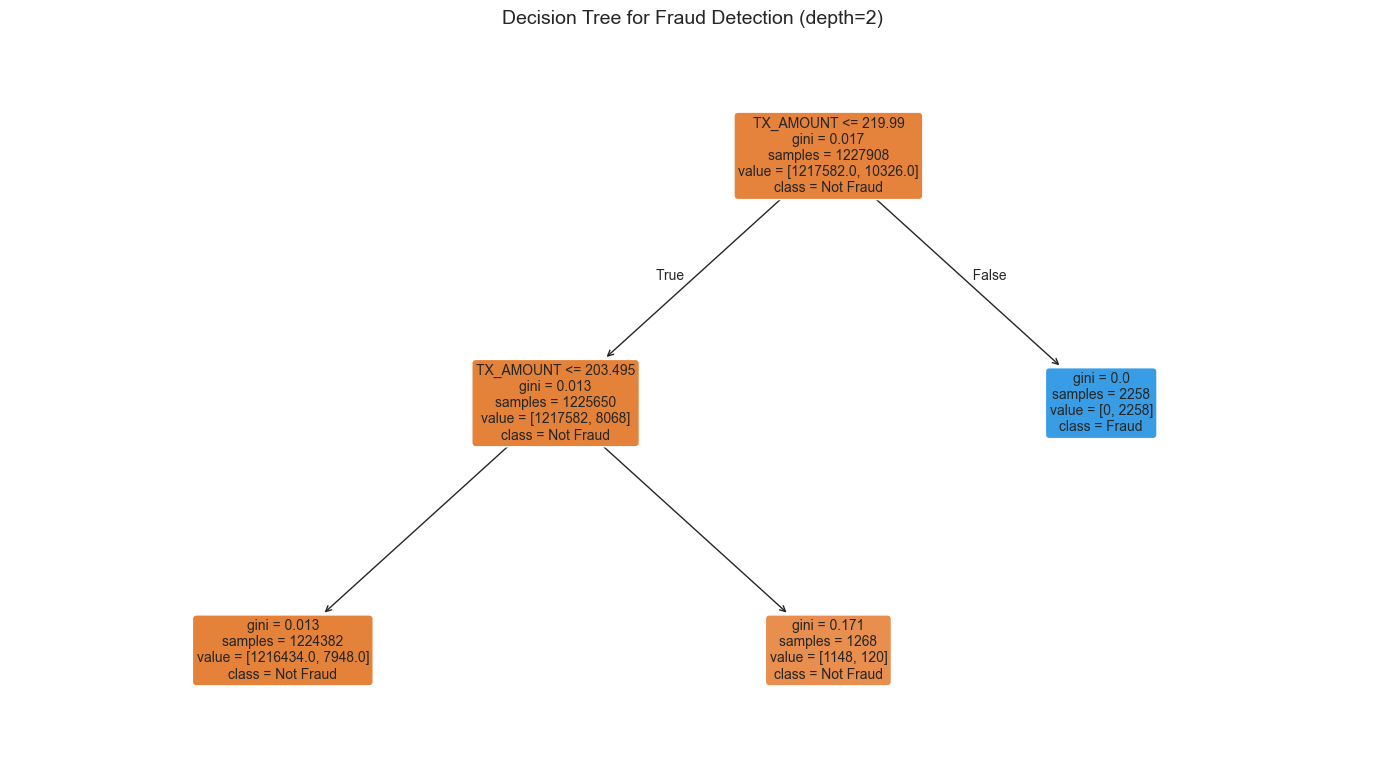

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(tree, 
          feature_names=input_features, 
          class_names=["Not Fraud", "Fraud"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree for Fraud Detection (depth=2)", fontsize=14)
plt.tight_layout()
plt.show()

**How to read the decision tree:**
- **Root node (top)**: The tree starts by splitting on the most important feature for separating fraud from non-fraud.
- **Each box shows**:
  - The feature and threshold used for the split
  - The number of samples in that region
  - The number of samples per class [genuine, fraud]
  - The predicted class for that region
- **Colors**: Orange = mostly genuine transactions, Blue = mostly fraudulent transactions.
- **Leaf nodes (bottom)**: These give the final prediction. The fraud probability for each leaf equals: (frauds in leaf) / (total samples in leaf).

**Insight from this tree:**
- The top split tells you the single most important feature for detecting fraud in your data.
- Look at the thresholds: for example, if `TX_AMOUNT > 218.67` leads to a fraud leaf, it means high-value transactions are strong fraud indicators.
- Each path from root to leaf represents a simple rule for fraud detection that you can explain to non-technical stakeholders.

## Experimental Method: Lab Diary

**Hypothesis:**
A Gradient Boosting classifier and a simple neural network (MLP) can predict fraud better than a single decision tree, especially after scaling numeric features. We’ll use cross-validation to compare them.

**Plan:**
- Use the same features as before (numeric, filled missing with 0).
- Try GradientBoostingClassifier and MLPClassifier.
- Use 5-fold cross-validation for fair comparison.
- Print all settings and results for each run.
- Tweak features or hyperparameters if needed and record changes.

### Step 1: Try Gradient Boosting (baseline)
We'll use GradientBoostingClassifier with fewer trees and simpler settings for faster training. We'll also use a sample of the data to speed things up.

### Why AUROC and Average Precision Matter for Fraud Detection

**The Problem with Accuracy:**
- Our dataset has only ~0.8% fraud (highly imbalanced).
- A "dumb" model that predicts "not fraud" for every transaction would get 99.2% accuracy!
- Accuracy treats all errors equally, but missing fraud (false negatives) is much more costly than false alarms.

**Why AUROC (Area Under ROC Curve) is Better:**
- AUROC measures how well the model ranks fraudulent transactions higher than legitimate ones.
- It's insensitive to class imbalance - works well even with rare fraud cases.
- Range: 0.5 = random guessing, 1.0 = perfect separation.
- Focuses on the model's ability to discriminate between classes at various thresholds.

**Why Average Precision is Better:**
- Average Precision focuses on precision-recall trade-off, which is critical when the positive class (fraud) is rare.
- It emphasizes how well the model performs on the minority class (fraud).
- Unlike AUROC, it's more sensitive to improvements in detecting the rare fraud cases.
- Range: baseline = fraud rate (~0.008), 1.0 = perfect precision and recall.

**What We'll Measure:**
- **Accuracy**: Overall correctness (but misleading for imbalanced data).
- **AUROC**: How well the model separates fraud from non-fraud.
- **Average Precision**: How precise the model is when it predicts fraud (most important for our use case).


**Run Order Reminder:**
1. Sampling helpers cell
2. Create sampled datasets cell
3. Logistic Regression cell
4. XGBoost / fallback cell

If you see NameError for `X_rand`, you skipped steps 1 or 2.

In [40]:
# Create sampled datasets
X_rand, y_rand = random_small_sample(X, y, n=50000)
X_under, y_under = random_undersample(X, y, ratio=1.5)
X_over, y_over = random_oversample(X, y)

print("Class balance (fraud %) ->")
for name, yy in [("random", y_rand), ("undersample", y_under), ("oversample", y_over)]:
    frac = (pd.Series(yy).mean()) * 100
    print(f"{name}: {frac:.2f}%")

Class balance (fraud %) ->
random: 0.81%
undersample: 40.00%
oversample: 50.00%


In [39]:
# Helper functions for sampling
import numpy as np
import pandas as pd

def random_undersample(X, y, ratio=1.0, random_state=42):
    y = pd.Series(y)
    fraud_idx = y[y == 1].index
    nonfraud_idx = y[y == 0].index
    target_nonfraud = int(len(fraud_idx) * ratio)
    rng = np.random.RandomState(random_state)
    keep_nonfraud = rng.choice(nonfraud_idx, size=min(target_nonfraud, len(nonfraud_idx)), replace=False)
    idx = np.concatenate([fraud_idx, keep_nonfraud])
    return X.loc[idx], y.loc[idx]

def random_oversample(X, y, random_state=42):
    y = pd.Series(y)
    fraud_idx = y[y == 1].index
    nonfraud_idx = y[y == 0].index
    rng = np.random.RandomState(random_state)
    dup_fraud = rng.choice(fraud_idx, size=max(len(nonfraud_idx) - len(fraud_idx), 0), replace=True)
    idx = np.concatenate([nonfraud_idx, fraud_idx, dup_fraud])
    return X.loc[idx], y.loc[idx]

def random_small_sample(X, y, n=50000, random_state=42):
    n = min(n, len(X))
    rng = np.random.RandomState(random_state)
    idx = rng.choice(X.index, size=n, replace=False)
    return X.loc[idx], pd.Series(y).loc[idx]


### Sampling Setup (Run Before Models)
Run the next two cells first to define helper functions and create `X_rand`, `X_under`, `X_over`.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Use a sample for faster training (50k transactions)
sample_size = min(50000, len(X))
sample_idx = np.random.RandomState(42).choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_idx]
y_sample = y.iloc[sample_idx]

# Use fewer trees and lower depth for speed
clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)
print("Experiment: GradientBoostingClassifier (fast settings)")
print(f"Sample size: {len(X_sample)}")
print(f"Features: {list(X.columns)}")
print(f"Key params: n_estimators=50, max_depth=3")
print()

# Calculate multiple metrics
accuracy_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='accuracy')
auroc_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='roc_auc')
avgprec_scores = cross_val_score(clf, X_sample, y_sample, cv=3, scoring='average_precision')

print(f"Cross-val Accuracy (3-fold): {accuracy_scores}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print()
print(f"Cross-val AUROC (3-fold): {auroc_scores}")
print(f"Mean AUROC: {np.mean(auroc_scores):.4f} ± {np.std(auroc_scores):.4f}")
print()
print(f"Cross-val Average Precision (3-fold): {avgprec_scores}")
print(f"Mean Average Precision: {np.mean(avgprec_scores):.4f} ± {np.std(avgprec_scores):.4f}")


Experiment: GradientBoostingClassifier (fast settings)
Sample size: 50000
Features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW']
Key params: n_estimators=50, max_depth=3

Cross-val Accuracy (3-fold): [0.99298014 0.99184016 0.9926197 ]
Mean Accuracy: 0.9925 ± 0.0005

Cross-val AUROC (3-fold): [0.67558989 0.66109262 0.6553566 ]
Mean AUROC: 0.6640 ± 0.0085

Cross-val Average Precision (3-fold): [0.19971315 0.12355998 0.1636017 ]
Mean Average Precision: 0.1623 ± 0.0311
Cross-val Accuracy (3-fold): [0.99298014 0.99184016 0.9926197 ]
Mean Accuracy: 0.9925 ± 0.0005

Cross-val AUROC (3-fold): [0.67558989 0.66109262 0.6553566 ]
Mean AUROC: 0.6640 ± 0.0085

Cross-val Average Precision (3-fold): [0.19971315 0.12355998 0.1636017 ]
Mean Average Precision: 0.1623 ± 0.0311


### Step 2: Try MLP (Neural Net)
We'll use a small network with fewer iterations for faster training. We'll also use the same sample for fair comparison.

In [42]:
from sklearn.neural_network import MLPClassifier

# Use small network and fewer iterations
mlp = MLPClassifier(hidden_layer_sizes=(16,), max_iter=50, random_state=42, early_stopping=True)
print("Experiment: MLPClassifier (fast settings)")
print(f"Sample size: {len(X_sample)}")
print(f"Features: {list(X.columns)}")
print(f"Key params: hidden_layers=(16,), max_iter=50, early_stopping=True")
print()

# Calculate multiple metrics
accuracy_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='accuracy')
auroc_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='roc_auc')
avgprec_scores = cross_val_score(mlp, X_sample, y_sample, cv=3, scoring='average_precision')

print(f"Cross-val Accuracy (3-fold): {accuracy_scores}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print()
print(f"Cross-val AUROC (3-fold): {auroc_scores}")
print(f"Mean AUROC: {np.mean(auroc_scores):.4f} ± {np.std(auroc_scores):.4f}")
print()
print(f"Cross-val Average Precision (3-fold): {avgprec_scores}")
print(f"Mean Average Precision: {np.mean(avgprec_scores):.4f} ± {np.std(avgprec_scores):.4f}")


Experiment: MLPClassifier (fast settings)
Sample size: 50000
Features: ['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW']
Key params: hidden_layers=(16,), max_iter=50, early_stopping=True

Cross-val Accuracy (3-fold): [0.99358013 0.99316014 0.99273971]
Mean Accuracy: 0.9932 ± 0.0003

Cross-val AUROC (3-fold): [0.59473022 0.64082054 0.63837145]
Mean AUROC: 0.6246 ± 0.0212

Cross-val Average Precision (3-fold): [0.27709735 0.25203213 0.25402509]
Mean Average Precision: 0.2611 ± 0.0114
Cross-val Accuracy (3-fold): [0.99358013 0.99316014 0.99273971]
Mean Accuracy: 0.9932 ± 0.0003

Cross-val AUROC (3-fold): [0.59473022 0.64082054 0.63837145]
Mean AUROC: 0.6246 ± 0.0212

Cross-val Average Precision (3-fold): [0.27709735 0.25203213 0.25402509]
Mean Average Precision: 0.2611 ± 0.0114


The model is overfitted!


In [43]:
# XGBoost (fallback) AFTER sampling cells above have run
use_xgb = True
try:
    from xgboost import XGBClassifier
except Exception:
    use_xgb = False
    from sklearn.ensemble import GradientBoostingClassifier as XGBClassifier

modelspec = (XGBClassifier(random_state=42)
             if use_xgb
             else XGBClassifier(n_estimators=50, max_depth=3, random_state=42))
print(f"Using: {'XGBClassifier' if use_xgb else 'GradientBoostingClassifier (fallback)'}")

for name, XX, yy in [
    ("random", X_rand, y_rand),
    ("undersample", X_under, y_under),
    ("oversample", X_over, y_over),
]:
    print(f"\nXGB ({name})")
    acc = cross_val_score(modelspec, XX, yy, cv=3, scoring='accuracy')
    auc = cross_val_score(modelspec, XX, yy, cv=3, scoring='roc_auc')
    ap = cross_val_score(modelspec, XX, yy, cv=3, scoring='average_precision')
    print(f"Accuracy: {acc.mean():.4f} ± {acc.std():.4f}")
    print(f"AUROC:   {auc.mean():.4f} ± {auc.std():.4f}")
    print(f"AvgPrec: {ap.mean():.4f} ± {ap.std():.4f}")


Using: XGBClassifier

XGB (random)
Accuracy: 0.9927 ± 0.0002
AUROC:   0.6554 ± 0.0267
AvgPrec: 0.2211 ± 0.0177

XGB (undersample)
Accuracy: 0.9927 ± 0.0002
AUROC:   0.6554 ± 0.0267
AvgPrec: 0.2211 ± 0.0177

XGB (undersample)
Accuracy: 0.7171 ± 0.0036
AUROC:   0.6710 ± 0.0033
AvgPrec: 0.6827 ± 0.0037

XGB (oversample)
Accuracy: 0.7171 ± 0.0036
AUROC:   0.6710 ± 0.0033
AvgPrec: 0.6827 ± 0.0037

XGB (oversample)
Accuracy: 0.7072 ± 0.0052
AUROC:   0.7981 ± 0.0011
AvgPrec: 0.8300 ± 0.0019
Accuracy: 0.7072 ± 0.0052
AUROC:   0.7981 ± 0.0011
AvgPrec: 0.8300 ± 0.0019


In [44]:
# Logistic Regression AFTER sampling cells above have run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

modelspec = LogisticRegression(max_iter=200, solver='lbfgs')

for name, XX, yy in [
    ("random", X_rand, y_rand),
    ("undersample", X_under, y_under),
    ("oversample", X_over, y_over),
]:
    print(f"\nLogistic ({name})")
    acc = cross_val_score(modelspec, XX, yy, cv=3, scoring='accuracy')
    auc = cross_val_score(modelspec, XX, yy, cv=3, scoring='roc_auc')
    ap = cross_val_score(modelspec, XX, yy, cv=3, scoring='average_precision')
    print(f"Accuracy: {acc.mean():.4f} ± {acc.std():.4f}")
    print(f"AUROC:   {auc.mean():.4f} ± {auc.std():.4f}")
    print(f"AvgPrec: {ap.mean():.4f} ± {ap.std():.4f}")



Logistic (random)
Accuracy: 0.9929 ± 0.0001
AUROC:   0.6720 ± 0.0253
AvgPrec: 0.2680 ± 0.0090

Logistic (undersample)
Accuracy: 0.9929 ± 0.0001
AUROC:   0.6720 ± 0.0253
AvgPrec: 0.2680 ± 0.0090

Logistic (undersample)
Accuracy: 0.7022 ± 0.0045
AUROC:   0.6713 ± 0.0079
AvgPrec: 0.6742 ± 0.0078

Logistic (oversample)
Accuracy: 0.7022 ± 0.0045
AUROC:   0.6713 ± 0.0079
AvgPrec: 0.6742 ± 0.0078

Logistic (oversample)
Accuracy: 0.6219 ± 0.0004
AUROC:   0.6516 ± 0.0076
AvgPrec: 0.7268 ± 0.0036
Accuracy: 0.6219 ± 0.0004
AUROC:   0.6516 ± 0.0076
AvgPrec: 0.7268 ± 0.0036


### GridSearch for XGBoost Hyperparameters
We'll search for the best hyperparameters using a small grid on the undersampled data (faster).

In [48]:
from sklearn.model_selection import GridSearchCV

# Try to use XGBoost, fallback to GradientBoosting
use_xgb = True
try:
    from xgboost import XGBClassifier
    base_model = XGBClassifier(random_state=42)
except Exception:
    use_xgb = False
    from sklearn.ensemble import GradientBoostingClassifier
    base_model = GradientBoostingClassifier(random_state=42)

print(f"Using: {'XGBClassifier' if use_xgb else 'GradientBoostingClassifier (fallback)'}")

# Simple parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3] if use_xgb else [0.1, 0.3]
}

# Use undersampled data for speed
grid = GridSearchCV(base_model, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
print(f"\nSearching {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['learning_rate'])} combinations on undersampled data...")
grid.fit(X_under, y_under)

print(f"\nBest params: {grid.best_params_}")
print(f"Best AUROC: {grid.best_score_:.4f}")

# Test best model on all three datasets
print("\n--- Best model performance ---")
best_model = grid.best_estimator_
for name, XX, yy in [("random", X_rand, y_rand), ("undersample", X_under, y_under), ("oversample", X_over, y_over)]:

    auc = cross_val_score(best_model, XX, yy, cv=3, scoring='roc_auc')
    ap = cross_val_score(best_model, XX, yy, cv=3, scoring='average_precision')
    print(f"\n{name}:")
 
    print(f"  AUROC:    {auc.mean():.4f} ± {auc.std():.4f}")
    print(f"  AvgPrec:  {ap.mean():.4f} ± {ap.std():.4f}")


Using: XGBClassifier

Searching 12 combinations on undersampled data...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best AUROC: 0.6812

--- Best model performance ---

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best AUROC: 0.6812

--- Best model performance ---

random:
  AUROC:    0.6674 ± 0.0138
  AvgPrec:  0.2522 ± 0.0064

random:
  AUROC:    0.6674 ± 0.0138
  AvgPrec:  0.2522 ± 0.0064

undersample:
  AUROC:    0.6812 ± 0.0073
  AvgPrec:  0.6905 ± 0.0032

undersample:
  AUROC:    0.6812 ± 0.0073
  AvgPrec:  0.6905 ± 0.0032

oversample:
  AUROC:    0.6531 ± 0.0242
  AvgPrec:  0.7367 ± 0.0160

oversample:
  AUROC:    0.6531 ± 0.0242
  AvgPrec:  0.7367 ± 0.0160
